In [117]:
# library provided by EPOCH for reading .sdf output files into Python
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import yt

In [118]:
# home-grown module
import utilities as util

In [119]:
# show plots in the notebook
%matplotlib inline

In [120]:
fname = '3d.sdf'
data_3d = sh.getdata(fname, verbose=False);

In [121]:
# normalization factor
norm = 2.73092449e-22

In [122]:
# N_ele are the accelerated electrons, from the Nitrogen K-shell
# particle momenta
px = data_3d.Particles_Px_N_ele.data
py = data_3d.Particles_Py_N_ele.data
pz = data_3d.Particles_Pz_N_ele.data
# particle weights
w = data_3d.Particles_Weight_N_ele.data
# particle positions
(x, y, z) = data_3d.Grid_Particles_N_ele.data

In [123]:
# load the electric field components
ex = data_3d.Electric_Field_Ex
ey = data_3d.Electric_Field_Ey
ez = data_3d.Electric_Field_Ez

In [124]:
# load the K-shell Nitrogen electrons
nNele = data_3d.Derived_Number_Density_N_ele
rho = nNele.data

In [125]:
# get the simulation box
(xx, yy, zz) = data_3d.Grid_Grid.data
# get bounds
xx_min = xx.min()
xx_max = xx.max()
yy_min = yy.min()
yy_max = yy.max()
zz_min = zz.min()
zz_max = zz.max()
bbox = np.array([[xx_min, xx_max], [yy_min, yy_max], [zz_min, zz_max]])

In [126]:
data = dict(number_density = (rho, '1/m**3'),
            particle_position_x = (x, 'm'), 
            particle_position_y = (y, 'm'),
            particle_position_z = (z, 'm'),
            particle_momentum_x = (px, 'kg*m/s'),
            particle_momentum_y = (py, 'kg*m/s'),
            particle_momentum_z = (pz, 'kg*m/s'),
            particle_weighting = (w, ''),
            electric_field_x = (ex.data, 'V/m'),
            electric_field_y = (ey.data, 'V/m'),
            electric_field_z = (ez.data, 'V/m')
           ) 

In [127]:
ds = yt.load_uniform_grid(data, data['number_density'][0].shape, bbox=bbox, nprocs=4,
                          length_unit='m', mass_unit='kg', time_unit='s', velocity_unit='m/s', unit_system='mks')

yt : [INFO     ] 2018-03-08 15:40:48,122 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-03-08 15:40:48,123 Parameters: domain_dimensions         = [1024   64   64]
yt : [INFO     ] 2018-03-08 15:40:48,123 Parameters: domain_left_edge          = [  1.19051758e-03  -5.00000000e-05  -5.00000000e-05]
yt : [INFO     ] 2018-03-08 15:40:48,124 Parameters: domain_right_edge         = [  1.22551758e-03   5.00000000e-05   5.00000000e-05]
yt : [INFO     ] 2018-03-08 15:40:48,125 Parameters: cosmological_simulation   = 0.0


In [128]:
print(ds.domain_left_edge)
print(ds.domain_right_edge)
print(ds.domain_width)

[  1.19051758e-03  -5.00000000e-05  -5.00000000e-05] code_length
[  1.22551758e-03   5.00000000e-05   5.00000000e-05] code_length
[  3.50000000e-05   1.00000000e-04   1.00000000e-04] code_length


In [129]:
def _magnitude(field, data):
    return np.sqrt(data['electric_field_x']**2 + data['electric_field_y']**2 + data['electric_field_z']**2)

In [130]:
ds.add_field(('stream', 'electric_field_magnitude'), units='V/m', function=_magnitude, sampling_type='cell')

yt : [INFO     ] 2018-03-08 15:40:49,035 Projection completed
yt : [INFO     ] 2018-03-08 15:40:49,036 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:49,036 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:49,037 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:49,038 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:49,039 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
yt : [INFO     ] 2018-03-08 15:40:49,206 Making a fixed resolution buffer of (('gas', 'number_density')) 500 by 500



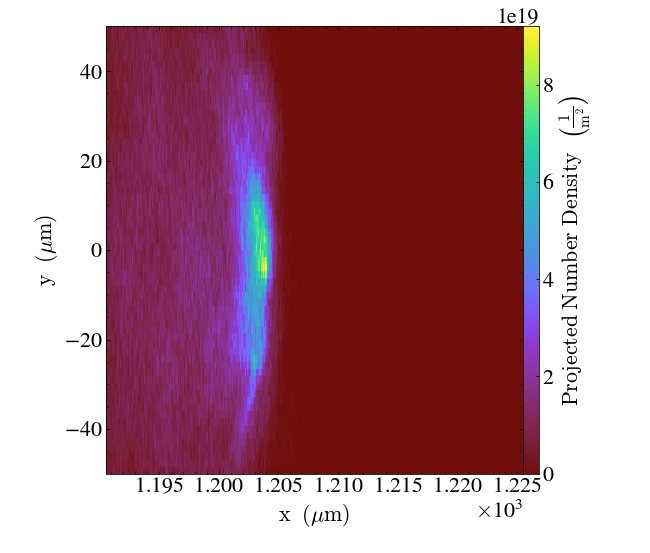

In [131]:
# plot the density, integrating over z
prj = yt.ProjectionPlot(ds, "z", 'number_density', origin='native', aspect=6/16)
prj.set_log("number_density", False);
prj.set_buff_size(500)
prj.set_figure_size(5.8)
prj.set_font_size(22)

yt : [INFO     ] 2018-03-08 15:40:50,283 Projection completed
yt : [INFO     ] 2018-03-08 15:40:50,284 xlim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:50,285 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:50,286 xlim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:50,286 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:50,289 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
yt : [INFO     ] 2018-03-08 15:40:50,455 Making a fixed resolution buffer of (('gas', 'number_density')) 500 by 500



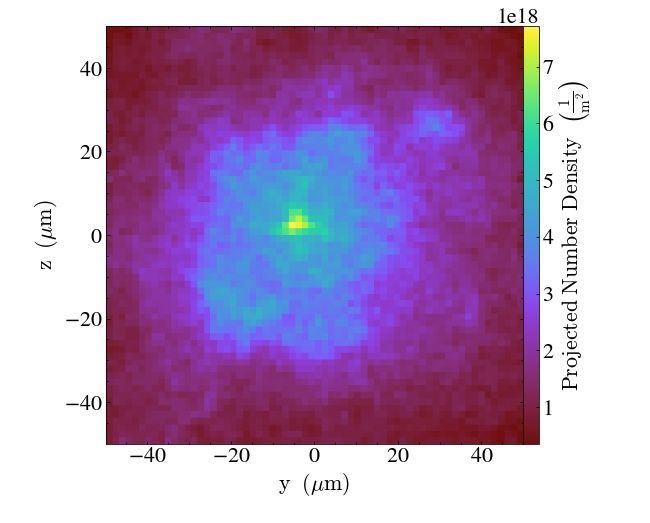

In [132]:
# plot the density, integrating over x
prj = yt.ProjectionPlot(ds, "x", 'number_density', origin='native')
prj.set_log("number_density", False);
prj.set_buff_size(500)
prj.set_figure_size(5.8)
prj.set_font_size(22)


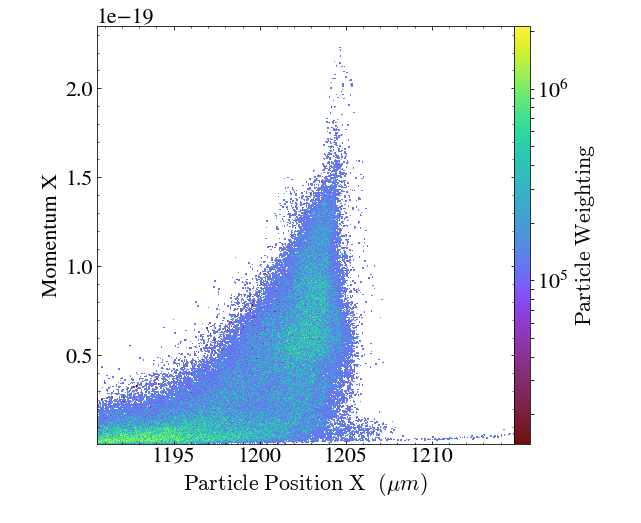

In [133]:
ppsx = yt.ParticlePlot(ds, 
                                         ('all', 'particle_position_x'), 
                                         ('all', 'particle_momentum_x'), 
                                         ('all', 'particle_weighting'),
                                         x_bins=800,
                                         y_bins=800)
ppsx.set_unit('particle_position_x', 'um')
ppsx.set_ylabel('Momentum X')
ppsx.set_figure_size(5.8)
ppsx.set_font_size(22)


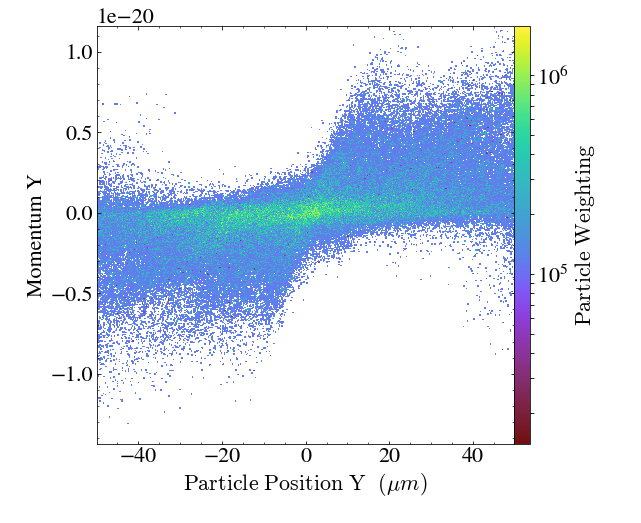

In [134]:
ppsy = yt.ParticlePlot(ds, 
                                         ('all', 'particle_position_y'), 
                                         ('all', 'particle_momentum_y'), 
                                         ('all', 'particle_weighting'),
                                         x_bins=800,
                                         y_bins=800)
ppsy.set_unit('particle_position_y', 'um')
ppsy.set_ylabel('Momentum Y')
ppsy.set_figure_size(5.8)
ppsy.set_font_size(22)

yt : [INFO     ] 2018-03-08 15:40:53,287 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:53,288 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:53,289 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:53,289 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:53,291 Making a fixed resolution buffer of (('stream', 'electric_field_x')) 800 by 800
yt : [INFO     ] 2018-03-08 15:40:53,345 Making a fixed resolution buffer of (('stream', 'electric_field_y')) 800 by 800
yt : [INFO     ] 2018-03-08 15:40:53,368 Making a fixed resolution buffer of (('stream', 'electric_field_z')) 800 by 800
yt : [INFO     ] 2018-03-08 15:40:53,393 Making a fixed resolution buffer of (('stream', 'electric_field_magnitude')) 800 by 800
yt : [WARNING  ] 2018-03-08 15:40:53,431 Plot image for field ('stream', 'electric_field_z') has both positive and negative values. Min = -279700819138.902588, Max = 238353812234.357758.
yt : [WARNING  ] 2018-03-08 15:40:53,432 Switching to s

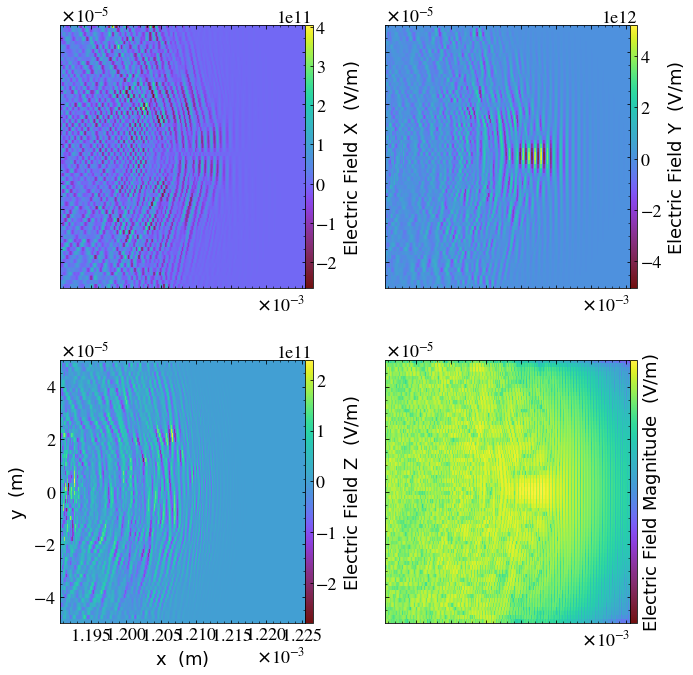

In [135]:
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()

grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (2, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['electric_field_x', 'electric_field_y', 'electric_field_z', 'electric_field_magnitude']

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = yt.SlicePlot(ds, 'z', fields, origin='native', aspect=6/16)
p.set_axes_unit('m')

# Velocity is going to be both positive and negative, so let's make these
# slices use a linear colorbar scale
p.set_log('electric_field_x', False)
p.set_log('electric_field_y', False)
p.set_log('electric_field_z', False)

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

yt : [INFO     ] 2018-03-08 15:40:55,719 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:55,719 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:55,721 xlim = 0.001191 0.001226
yt : [INFO     ] 2018-03-08 15:40:55,722 ylim = -0.000050 0.000050
yt : [INFO     ] 2018-03-08 15:40:55,725 Making a fixed resolution buffer of (('stream', 'electric_field_magnitude')) 800 by 800



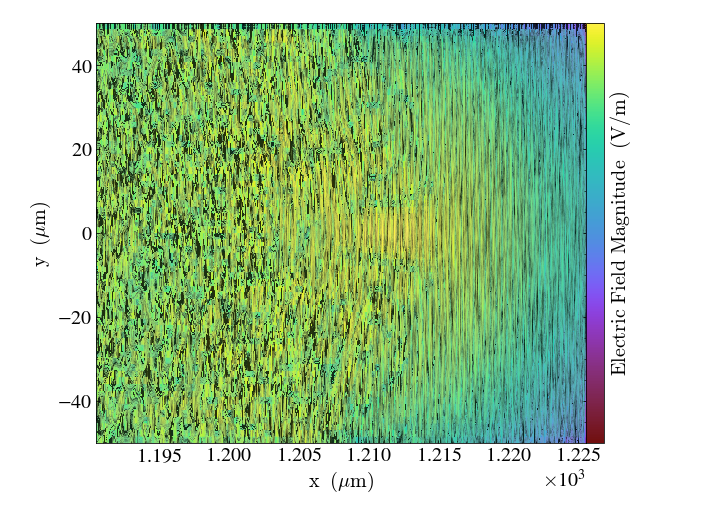

In [136]:
slc = yt.SlicePlot(ds, 'z', 'electric_field_magnitude', origin='native', aspect=6/20)
slc.annotate_line_integral_convolution('electric_field_x', 'electric_field_y', lim=(0.4,0.65))
slc.set_figure_size(6.8)
slc.set_font_size(20)